In [0]:
%%capture
!pip install talos

# Import dataset from Google Drive

In [5]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# pietro
output_preprocessing = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/output_preprocessing_50_clusters.csv")
# carlo
#output_preprocessing = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/output_preprocessing_50_clusters.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Keras train test definition

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

cols = list(output_preprocessing.columns.values)
cols.remove('trip_duration')

target = output_preprocessing.loc[:, 'trip_duration']
features = output_preprocessing.loc[:, cols]

train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=0.20, random_state=0)

train_x, train_y = np.array(train_features), np.array(train_target)
test_x, test_y = np.array(test_features), np.array(test_target)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled_x = scaler.fit_transform(train_x)
test_scaled_x = scaler.transform(test_x)

# Model 

In [7]:
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils
from talos.utils import hidden_layers


def model_def (x_train, y_train, x_val, y_val, params):
  num_features = x_train.shape[1]

  model = Sequential()
  model.add(Dense(126, input_dim=num_features, activation='relu'))

  model.add(Dense(32, activation='relu'))

  model.add(Dense(64, activation='relu'))


  #model.add(Dropout(params['dropout']))
  
  #hidden_layers(model, params, 1)
  
  model.add(Dense(1, activation = 'relu'))
  model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer'])), loss=params['loss'], metrics=['mse', 'mae', 'mape', 'cosine'])
  model.summary()
  history = model.fit(x_train, train_y,
                      validation_data=[x_val, y_val],
                      epochs=params['epochs'],
                      batch_size=params['batch_size'],
                      verbose=True)
  
  return history, model

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
from talos.utils import lr_normalizer
from keras.optimizers import Adam, Nadam, RMSprop
from keras.activations import softmax, relu, elu, sigmoid
from keras.losses import mean_squared_error

p = {'lr': (0.5, 5, 10),
     'first_neuron':[32, 64, 128, 256],
     'hidden_layers':[0, 1, 2],
     'shapes': ['brick'],
     'batch_size': [64, 128, 256],
     'epochs': [20],
     'dropout': (0, 0.5, 5),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'optimizer': [Adam],
     'loss': [mean_squared_error],
     'activation':[relu],
     'last_activation': [relu]}

In [17]:
import talos
from talos.utils import lr_normalizer

t = talos.Scan(x=train_scaled_x,
            y=np.log(train_y + 1),
            x_val = test_scaled_x,
            y_val = np.log(test_y + 1),
            model=model_def,
            fraction_limit=0.01, 
            params=p,
            experiment_name='taxi',
            #experiment_no='1'
            )





  0%|          | 0/36 [00:00<?, ?it/s]

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 126)               2772      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                4064      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 16s 14us/step - loss: 181207.4379 - mse: 181207.4219 - mae: 275.0143 - mape: 45.2985 - cosine: 0.9997 - val_loss: 1010601.5867 - val_ms





  3%|▎         | 1/36 [05:28<3:11:45, 328.73s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 16s 14us/step - loss: 142366.1161 - mse: 142366.0000 - mae: 242.9025 - mape: 39.3542 - cosine: 1.0000 - val_loss: 1077703.2811 - val_ms





  6%|▌         | 2/36 [10:49<3:04:58, 326.44s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 16s 14us/step - loss: 142922.1479 - mse: 142921.9844 - mae: 243.6196 - mape: 39.8923 - cosine: 0.9999 - val_loss: 924481.2454 - val_mse





  8%|▊         | 3/36 [16:10<2:58:36, 324.75s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 16s 14us/step - loss: 178125.6876 - mse: 178125.4062 - mae: 271.9500 - mape: 44.4495 - cosine: 0.9998 - val_loss: 1002200.0141 - val_ms





 11%|█         | 4/36 [21:22<2:51:04, 320.77s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 9s 8us/step - loss: 155886.9021 - mse: 155886.8750 - mae: 253.9816 - mape: 41.1762 - cosine: 0.9999 - val_loss: 1052062.8655 - val_mse:





 14%|█▍        | 5/36 [24:22<2:23:55, 278.56s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 15s 13us/step - loss: 143193.6765 - mse: 143193.5000 - mae: 245.2507 - mape: 40.3356 - cosine: 1.0000 - val_loss: 926625.5623 - val_mse





 17%|█▋        | 6/36 [29:11<2:20:49, 281.64s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 141013.8868 - mse: 141013.6719 - mae: 241.0320 - mape: 38.7535 - cosine: 1.0000 - val_loss: 971777.0864 - val_mse





 19%|█▉        | 7/36 [34:08<2:18:24, 286.35s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 26s 23us/step - loss: 137725.6503 - mse: 137725.5312 - mae: 240.1918 - mape: 39.1992 - cosine: 0.9999 - val_loss: 925032.2623 - val_mse





 22%|██▏       | 8/36 [42:50<2:46:36, 357.02s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 163964.8973 - mse: 163964.8750 - mae: 261.6874 - mape: 43.1227 - cosine: 1.0000 - val_loss: 966981.1265 - val_mse





 25%|██▌       | 9/36 [47:37<2:31:14, 336.11s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 26s 22us/step - loss: 1137034.6284 - mse: 1137031.5000 - mae: 838.9208 - mape: 100.0000 - cosine: 0.0000e+00 - val_loss: 42.4964 - val_





 28%|██▊       | 10/36 [56:06<2:48:04, 387.87s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 150414.1571 - mse: 150414.2969 - mae: 249.6013 - mape: 41.1574 - cosine: 0.9999 - val_loss: 1008350.9073 - val_ms





 31%|███       | 11/36 [1:00:52<2:28:54, 357.39s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 9s 8us/step - loss: 153261.0107 - mse: 153260.9844 - mae: 252.5053 - mape: 41.7353 - cosine: 0.9998 - val_loss: 1105693.5214 - val_mse:





 33%|███▎      | 12/36 [1:03:42<2:00:26, 301.12s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 151682.6891 - mse: 151682.6406 - mae: 248.1980 - mape: 39.9234 - cosine: 0.9947 - val_loss: 1004532.8949 - val_ms





 36%|███▌      | 13/36 [1:08:25<1:53:20, 295.69s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 25s 21us/step - loss: 138731.3127 - mse: 138730.9844 - mae: 240.7182 - mape: 39.1885 - cosine: 1.0000 - val_loss: 819665.5748 - val_mse





 39%|███▉      | 14/36 [1:16:46<2:11:04, 357.47s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 144747.5461 - mse: 144747.7500 - mae: 246.5735 - mape: 40.8053 - cosine: 1.0000 - val_loss: 1065817.7541 - val_ms





 42%|████▏     | 15/36 [1:21:26<1:56:55, 334.05s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 24s 21us/step - loss: 131923.3480 - mse: 131923.4531 - mae: 232.4297 - mape: 37.1388 - cosine: 1.0000 - val_loss: 1032114.2834 - val_ms





 44%|████▍     | 16/36 [1:29:51<2:08:29, 385.48s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 9s 7us/step - loss: 152701.0512 - mse: 152701.0938 - mae: 253.1800 - mape: 42.0554 - cosine: 1.0000 - val_loss: 942174.2215 - val_mse: 





 47%|████▋     | 17/36 [1:32:40<1:41:27, 320.40s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 8s 7us/step - loss: 159578.0168 - mse: 159578.0000 - mae: 257.8893 - mape: 42.6263 - cosine: 0.9999 - val_loss: 1010465.0505 - val_mse:





 50%|█████     | 18/36 [1:35:30<1:22:34, 275.27s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 141043.9422 - mse: 141043.9375 - mae: 241.0112 - mape: 38.9543 - cosine: 0.9999 - val_loss: 1110820.9986 - val_ms





 53%|█████▎    | 19/36 [1:40:11<1:18:31, 277.15s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 139953.0645 - mse: 139953.1250 - mae: 240.0620 - mape: 38.5966 - cosine: 0.9999 - val_loss: 1041144.4756 - val_ms





 56%|█████▌    | 20/36 [1:44:57<1:14:37, 279.83s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 9s 7us/step - loss: 156074.1608 - mse: 156074.2031 - mae: 252.6472 - mape: 41.0759 - cosine: 0.9998 - val_loss: 1014924.2235 - val_mse:





 58%|█████▊    | 21/36 [1:47:47<1:01:39, 246.61s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 15s 13us/step - loss: 140856.2083 - mse: 140856.1562 - mae: 241.4800 - mape: 38.9676 - cosine: 1.0000 - val_loss: 952161.4376 - val_mse





 61%|██████    | 22/36 [1:52:34<1:00:22, 258.78s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 8s 7us/step - loss: 159130.9641 - mse: 159131.0000 - mae: 256.6135 - mape: 42.2684 - cosine: 0.9998 - val_loss: 1051753.4819 - val_mse:





 64%|██████▍   | 23/36 [1:55:23<50:14, 231.91s/it]  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 14s 12us/step - loss: 139445.8895 - mse: 139445.9531 - mae: 239.8060 - mape: 38.5153 - cosine: 1.0000 - val_loss: 961373.8052 - val_mse





 67%|██████▋   | 24/36 [2:00:04<49:20, 246.68s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 25s 22us/step - loss: 138795.0281 - mse: 138795.5156 - mae: 239.0921 - mape: 38.5017 - cosine: 1.0000 - val_loss: 1060654.8949 - val_ms





 69%|██████▉   | 25/36 [2:08:37<59:51, 326.51s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 27s 23us/step - loss: 160175.8623 - mse: 160175.8281 - mae: 258.3544 - mape: 41.9881 - cosine: 0.9992 - val_loss: 1022931.1804 - val_ms





 72%|███████▏  | 26/36 [2:17:47<1:05:35, 393.53s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 28s 24us/step - loss: 141056.2352 - mse: 141056.5156 - mae: 241.9467 - mape: 39.1246 - cosine: 1.0000 - val_loss: 1118459.9033 - val_ms





 75%|███████▌  | 27/36 [2:27:01<1:06:15, 441.67s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 15s 13us/step - loss: 142647.1671 - mse: 142646.7031 - mae: 242.6249 - mape: 39.1977 - cosine: 0.9999 - val_loss: 1010069.2956 - val_ms





 78%|███████▊  | 28/36 [2:32:09<53:34, 401.76s/it]  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 28s 24us/step - loss: 141480.4047 - mse: 141480.6250 - mae: 240.9904 - mape: 38.4134 - cosine: 0.9998 - val_loss: 993199.1356 - val_mse





 81%|████████  | 29/36 [2:41:41<52:48, 452.69s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 10s 9us/step - loss: 1137034.4224 - mse: 1137035.6250 - mae: 838.9211 - mape: 100.0000 - cosine: 0.0000e+00 - val_loss: 42.4964 - val_m





 83%|████████▎ | 30/36 [2:44:53<37:27, 374.63s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 16s 14us/step - loss: 148396.1102 - mse: 148395.6562 - mae: 249.9258 - mape: 41.2035 - cosine: 0.9991 - val_loss: 989374.1726 - val_mse





 86%|████████▌ | 31/36 [2:50:13<29:50, 358.07s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 9s 8us/step - loss: 211489.4611 - mse: 211489.6250 - mae: 299.4081 - mape: 51.0842 - cosine: 1.0000 - val_loss: 989355.8487 - val_mse: 





 89%|████████▉ | 32/36 [2:53:22<20:29, 307.35s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 30s 26us/step - loss: 146221.4244 - mse: 146221.7812 - mae: 245.3855 - mape: 39.1110 - cosine: 0.9990 - val_loss: 997170.8168 - val_mse





 92%|█████████▏| 33/36 [3:03:02<19:27, 389.23s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 28s 24us/step - loss: 145134.6237 - mse: 145134.4531 - mae: 243.6321 - mape: 39.0027 - cosine: 0.9945 - val_loss: 975584.1994 - val_mse





 94%|█████████▍| 34/36 [3:12:36<14:49, 444.53s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 16s 14us/step - loss: 153231.8979 - mse: 153232.0625 - mae: 253.8325 - mape: 42.0760 - cosine: 1.0000 - val_loss: 954980.1090 - val_mse





 97%|█████████▋| 35/36 [3:18:00<06:48, 408.42s/it]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 126)               2772      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4064      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 9,013
Trainable params: 9,013
Non-trainable params: 0
_________________________________________________________________
Train on 1156982 samples, validate on 289246 samples
Epoch 1/20
1156982/1156982 [==============================] - 16s 14us/step - loss: 138265.4365 - mse: 138265.5156 - mae: 238.2367 - mape: 38.2048 - cosine: 1.0000 - val_loss: 897577.5986 - val_mse





100%|██████████| 36/36 [3:23:23<00:00, 382.88s/it]





In [105]:
len(train_scaled_x)%3

0

# Testing the model

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,cosine_proximity,epoch
95,0.117497,0.117497,0.250207,4.004454,-1.0,95
96,0.117456,0.117456,0.250099,4.003096,-1.0,96
97,0.117400,0.117400,0.250057,4.002487,-1.0,97
98,0.117321,0.117321,0.249879,3.999507,-1.0,98
99,0.117229,0.117229,0.249832,3.998828,-1.0,99


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
n_epochs = 25
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('cosine_proximity')
    plt.plot(x_plot, network_history.history['cosine_proximity'])
    plt.plot(x_plot, network_history.history['val_cosine_proximity'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_absolute_error')
    plt.plot(x_plot, network_history.history['mean_absolute_error'])
    plt.plot(x_plot, network_history.history['val_mean_absolute_error'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_absolute_percentage_error')
    plt.plot(x_plot, network_history.history['mean_absolute_percentage_error'])
    plt.plot(x_plot, network_history.history['val_mean_absolute_percentage_error'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_squared_error')
    plt.plot(x_plot, network_history.history['mean_squared_error'])
    plt.plot(x_plot, network_history.history['val_mean_squared_error'])
    plt.legend(['Training', 'Validation'])

plot_history(hist)

In [0]:
import tensorflow as tf
!pip install git+https://github.com/tensorflow/docs
print(tf.__version__)
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [0]:
from matplotlib import pyplot

# plot metrics
pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

KeyError: ignored

In [0]:
pred = model.predict(test_scaled_x)
pred = pred.flatten()
pred = np.exp(pred)+1

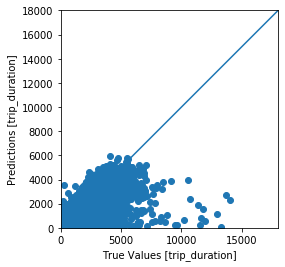

In [0]:
import matplotlib.pyplot as plt

a = plt.axes(aspect='equal')
plt.scatter(test_y, pred)
plt.xlabel('True Values [trip_duration]')
plt.ylabel('Predictions [trip_duration]')
lims = [0, 18000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
# Root Mean Squared Logarithmic Error
np.sqrt(np.mean(np.square(np.log(pred + 1) - np.log(test_y + 1)), axis=-1))

0.3430566070977301

# Prediction


In [0]:
# carlo
test_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/test_weather_osm_50_clusters.csv")
test_weather_osm = test_weather_osm.drop(columns=['id'])

In [0]:
test_weather_osm.head()

,total_distance,total_travel_time,number_of_steps,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth,vendor_id,passenger_count,store_and_fwd_flag,pickup_cluster,dropoff_cluster,JFK_start,JFK_end,guardia_start,guardia_end,pickup_hour,pickup_minute,pickup_day_week
0,1497.1,200.2,7,13.333333,10.555556,11.944444,1.5494,0.0,0.00,1,1,0,6,48,False,False,False,False,13,2,5
1,1427.1,141.5,2,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,1,0,37,36,False,False,False,False,18,45,4
2,2312.3,324.6,9,2.222222,-2.777778,-0.277778,0.0000,0.0,0.00,2,5,0,6,23,False,False,False,False,0,48,3
3,931.8,84.2,4,5.000000,-1.111111,1.944444,0.0000,0.0,15.24,1,1,0,23,39,False,False,False,False,8,20,4
4,2501.7,294.7,8,30.555556,22.777778,26.666667,0.0000,0.0,0.00,2,3,0,29,46,False,False,False,False,13,37,4


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

test_weather_osm_array = np.array(test_weather_osm)

test_weather_osm_scaled_x = scaler.transform(test_weather_osm_array)

In [0]:
pred = model.predict(test_weather_osm_scaled_x)
pred = pred.flatten()
pred = np.exp(pred)+1

In [0]:
test_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/test_weather_osm_50_clusters.csv")

test_weather_osm['trip_duration'] = pred.tolist()

test_weather_osm[['id', 'trip_duration']].to_csv('neural_submission_50_clusters.csv', index=False)
# pietro
#!cp /content/neural_submission.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"
# carlo
!cp /content/neural_submission_50_clusters.csv "/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/"


In [0]:
test_weather_osm.shape

(625134, 23)